In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.DataFrame()
data = pd.read_csv('D:/HW and Tests/Fall_2021_curriculums/Data Mining/data/active_players.csv')

In [3]:
data.head

<bound method NDFrame.head of                  Name            Team Position  Age  Height  Weight  \
0      Juhann Begarin  Boston Celtics       SG   19    6.50     185   
1        Jaylen Brown  Boston Celtics       SG   24    6.60     223   
2           Kris Dunn  Boston Celtics       PG   27    6.30     205   
3      Carsen Edwards  Boston Celtics       PG   23    5.11     200   
4          Tacko Fall  Boston Celtics        C   25    7.50     311   
..                ...             ...      ...  ...     ...     ...   
553      Juwan Morgan       Utah Jazz       SF   24    6.70     232   
554     Royce O'Neale       Utah Jazz       PF   28    6.40     226   
555       Olumiye Oni       Utah Jazz       SG   24    6.50     206   
556     Eric Paschall       Utah Jazz        F   24    6.60     255   
557  Hassan Whiteside       Utah Jazz        C   32    7.00     265   

        College      Salary  
0           NaN         NaN  
1    California  26758928.0  
2    Providence   5005350.0

In [4]:
data.shape

(558, 8)

In [5]:
data.columns

Index(['Name', 'Team', 'Position', 'Age', 'Height', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [6]:
data1 = pd.DataFrame()
data1 = data.drop(['Team','Position','College'],1)

In [7]:
data1

,Name,Age,Height,Weight,Salary
0,Juhann Begarin,19,6.50,185,NaN
1,Jaylen Brown,24,6.60,223,26758928.0
2,Kris Dunn,27,6.30,205,5005350.0
3,Carsen Edwards,23,5.11,200,1782621.0
4,Tacko Fall,25,7.50,311,NaN
...,...,...,...,...,...
553,Juwan Morgan,24,6.70,232,NaN
554,Royce O'Neale,28,6.40,226,8800000.0
555,Olumiye Oni,24,6.50,206,1782621.0
556,Eric Paschall,24,6.60,255,1782621.0


In [8]:
data1 = data1[data1['Salary']> 0]

In [9]:
data1

,Name,Age,Height,Weight,Salary
1,Jaylen Brown,24,6.60,223,26758928.0
2,Kris Dunn,27,6.30,205,5005350.0
3,Carsen Edwards,23,5.11,200,1782621.0
5,Bruno Fernando,23,6.90,240,1782621.0
6,Al Horford,35,6.90,240,27000000.0
...,...,...,...,...,...
552,Donovan Mitchell,25,6.10,215,28103500.0
554,Royce O'Neale,28,6.40,226,8800000.0
555,Olumiye Oni,24,6.50,206,1782621.0
556,Eric Paschall,24,6.60,255,1782621.0


In [10]:
data1.describe()

,Age,Height,Weight,Salary
count,445.000000,445.000000,445.000000,4.450000e+02
mean,25.692135,6.501438,216.752809,8.813696e+06
std,4.392567,0.317934,24.304136,9.886777e+06
min,18.000000,5.100000,160.000000,9.252580e+05
25%,22.000000,6.300000,200.000000,1.802057e+06
50%,25.000000,6.500000,215.000000,4.447896e+06
75%,29.000000,6.800000,233.000000,1.200000e+07
max,41.000000,7.400000,290.000000,4.578097e+07


In [11]:
data1.columns

Index(['Name', 'Age', 'Height', 'Weight', 'Salary'], dtype='object')

In [12]:
data1.describe

<bound method NDFrame.describe of                  Name  Age  Height  Weight      Salary
1        Jaylen Brown   24    6.60     223  26758928.0
2           Kris Dunn   27    6.30     205   5005350.0
3      Carsen Edwards   23    5.11     200   1782621.0
5      Bruno Fernando   23    6.90     240   1782621.0
6          Al Horford   35    6.90     240  27000000.0
..                ...  ...     ...     ...         ...
552  Donovan Mitchell   25    6.10     215  28103500.0
554     Royce O'Neale   28    6.40     226   8800000.0
555       Olumiye Oni   24    6.50     206   1782621.0
556     Eric Paschall   24    6.60     255   1782621.0
557  Hassan Whiteside   32    7.00     265   1669178.0

[445 rows x 5 columns]>

In [13]:
data1Normalized = data1.copy()
  
# normalization using the max value
for column in data1Normalized[['Age','Height','Weight','Salary']]:
    data1Normalized[column] = data1Normalized[column]  / data1Normalized[column].max()
      
# view normalized data
display(data1Normalized)

,Name,Age,Height,Weight,Salary
1,Jaylen Brown,0.585366,0.891892,0.768966,0.584499
2,Kris Dunn,0.658537,0.851351,0.706897,0.109333
3,Carsen Edwards,0.560976,0.690541,0.689655,0.038938
5,Bruno Fernando,0.560976,0.932432,0.827586,0.038938
6,Al Horford,0.853659,0.932432,0.827586,0.589765
...,...,...,...,...,...
552,Donovan Mitchell,0.609756,0.824324,0.741379,0.613869
554,Royce O'Neale,0.682927,0.864865,0.779310,0.192220
555,Olumiye Oni,0.585366,0.878378,0.710345,0.038938
556,Eric Paschall,0.585366,0.891892,0.879310,0.038938


In [14]:
def euclidean_dist(v1, v2):
    dist = 0
    for i in range(len(v1)):
        dist += pow(v1[i] - v2[i],2)
    return dist

In [15]:
def inner_product(v1, v2):
    product = 0
    for i in range(len(v1)):
        product += v1[i] * v2[i]
    return product

In [16]:
def vect_len(v1):
    temp = 0.0
    for i in range(len(v1)):
        temp += v1[i]*v1[i]
    return(math.sqrt(temp))

In [17]:
def cosine_sim(v1, v2):
    lenV1 = vect_len(v1)
    lenV2 = vect_len(v2)
    innerV1V2 = inner_product(v1, v2)
    cosV1V2 = innerV1V2/(lenV1 * lenV2)
    return cosV1V2

In [18]:
dataName = pd.DataFrame()
dataName = data1Normalized.loc[:,'Name']
display(dataName)

1          Jaylen Brown
2             Kris Dunn
3        Carsen Edwards
5        Bruno Fernando
6            Al Horford
             ...       
552    Donovan Mitchell
554       Royce O'Neale
555         Olumiye Oni
556       Eric Paschall
557    Hassan Whiteside
Name: Name, Length: 445, dtype: object

In [19]:
dataNameArr = dataName.to_numpy()
dataNameArr

array(['Jaylen Brown', 'Kris Dunn', 'Carsen Edwards', 'Bruno Fernando',
       'Al Horford', 'Enes Kanter', 'Romeo Langford', 'Aaron Nesmith',
       'Jabari Parker', 'Payton Pritchard', 'Josh Richardson',
       'Dennis Schroder', 'Marcus Smart', 'Jayson Tatum',
       'Grant Williams', 'Robert Williams III', "DeAndre' Bembry",
       'Bruce Brown', 'Jevon Carter', 'Nicolas Claxton',
       'Sekou Doumbouya', 'Kevin Durant', 'Blake Griffin', 'James Harden',
       'Joe Harris', 'Kyrie Irving', 'Alize Johnson', 'James Johnson',
       'Patty Mills', 'Jahlil Okafor', "Day'Ron Sharpe", 'Cameron Thomas',
       'Dwayne Bacon', 'RJ Barrett', 'Alec Burks', 'Evan Fournier',
       'Taj Gibson', 'Quentin Grimes', 'Kevin Knox II', 'Miles McBride',
       'Nerlens Noel', 'Immanuel Quickley', 'Julius Randle',
       'Mitchell Robinson', 'Derrick Rose', 'Obi Toppin', 'Luca Vildoza',
       'Kemba Walker', 'Seth Curry', 'Andre Drummond', 'Joel Embiid',
       'Danny Green', 'Tobias Harris', 'Isaia

In [20]:
data2 = pd.DataFrame()
data2 = data1Normalized.drop(['Name'],1)
display(data2)

,Age,Height,Weight,Salary
1,0.585366,0.891892,0.768966,0.584499
2,0.658537,0.851351,0.706897,0.109333
3,0.560976,0.690541,0.689655,0.038938
5,0.560976,0.932432,0.827586,0.038938
6,0.853659,0.932432,0.827586,0.589765
...,...,...,...,...
552,0.609756,0.824324,0.741379,0.613869
554,0.682927,0.864865,0.779310,0.192220
555,0.585366,0.878378,0.710345,0.038938
556,0.585366,0.891892,0.879310,0.038938


In [21]:
data2Arr = data2.to_numpy()
data2Arr

array([[0.58536585, 0.89189189, 0.76896552, 0.58449898],
       [0.65853659, 0.85135135, 0.70689655, 0.10933256],
       [0.56097561, 0.69054054, 0.68965517, 0.03893804],
       ...,
       [0.58536585, 0.87837838, 0.71034483, 0.03893804],
       [0.58536585, 0.89189189, 0.87931034, 0.03893804],
       [0.7804878 , 0.94594595, 0.9137931 , 0.03646009]])

In [22]:
# define a similarity matrix that has n x 4 columns (col1 and col2 are the two players being compared; col3 and col4 are
# the similarity values derived from the two similarity measures)
playerSim = []
maxDist = euclidean_dist(data2Arr[0], data2Arr[1])
for i in range(len(data2Arr)):
    for j in range(i+1, len(data2Arr)):
        dist = euclidean_dist(data2Arr[i], data2Arr[j])
        if dist > maxDist:
            maxDist = dist
        cosSim = cosine_sim(data2Arr[i], data2Arr[j])
        playerSim.append([dataNameArr[i], dataNameArr[j], dist, cosSim])

# Scale the Euclidean distance to [0, 1]
# convert to similarity value.
for i in range(len(playerSim)):
    playerSim[i][2] = 1.0 - playerSim[i][2]/(maxDist)

In [23]:
playerSim

[['Jaylen Brown', 'Kris Dunn', 0.7901822882911526, 0.9421756425441387],
 ['Jaylen Brown', 'Carsen Edwards', 0.6940388290009472, 0.9237360428703807],
 ['Jaylen Brown', 'Bruno Fernando', 0.7310599690932233, 0.9242457316632838],
 ['Jaylen Brown', 'Al Horford', 0.9316471329570899, 0.9906513900793489],
 ['Jaylen Brown', 'Enes Kanter', 0.7087681360789873, 0.9184116864791024],
 ['Jaylen Brown', 'Romeo Langford', 0.7711757417506138, 0.9380049143719685],
 ['Jaylen Brown', 'Aaron Nesmith', 0.7681275450616025, 0.936696197358944],
 ['Jaylen Brown', 'Jabari Parker', 0.7387003805460448, 0.9272787206302123],
 ['Jaylen Brown', 'Payton Pritchard', 0.7306953924819612, 0.9283429870786922],
 ['Jaylen Brown', 'Josh Richardson', 0.8924949417956429, 0.9717786599449765],
 ['Jaylen Brown', 'Dennis Schroder', 0.782127232177265, 0.9425521651717904],
 ['Jaylen Brown', 'Marcus Smart', 0.9284454267630098, 0.9811655399318194],
 ['Jaylen Brown', 'Jayson Tatum', 0.9962782223879323, 0.9989873985590977],
 ['Jaylen Brown

In [24]:
EuclideanCosArr = pd.DataFrame(playerSim, columns = ['player_1','player_2', 'euclidean_distance', 'cosine_similarity'])

In [25]:
EuclideanCosArr.to_csv('D:/HW and Tests/Fall_2021_curriculums/Data Mining/data/player_sim.csv')

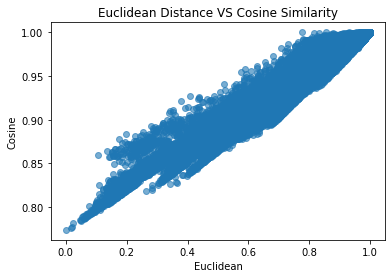

In [29]:
plt.scatter(EuclideanCosArr["euclidean_distance"], EuclideanCosArr["cosine_similarity"], alpha = 0.6)
plt.title("Euclidean Distance VS Cosine Similarity")
plt.xlabel("Euclidean")
plt.ylabel("Cosine")
plt.show()